**Fire Data Set Data exploration and visualization**

Set Up

In [ ]:
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [48]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the **data**

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/fire/"

In [ ]:
fire_PATH = os.path.join("datasets", "fire")
fire_URL ="https://github.com/Gowresh-HW/DMLL-F21DL/blob/main/Dataset/fire_archive.csv"
def fetch_fire_data(fire_url=fire_URL, fire_path=fire_PATH):
    os.makedirs(fire_path, exist_ok=True)
    urllib.request.urlretrieve(fire_url)

In [ ]:
fetch_fire_data()
# calling the function fetch_fire_data, (defined above) creates a datasets/fire directory in the workspace,
# extracts the fire.csv file from it in this directory 

load_fire_data function loads the fire.csv into a panda dataframe

In [28]:
def load_fire_data(fire_path=fire_PATH):
    csv_path = os.path.join(fire_path, "fire.csv")
    return pd.read_csv(csv_path)

In [31]:
fire = load_fire_data() # "fire" is a pandas DataFrame object containing all the data
fire.head() # Display the top five rows of the DataFrame
#Q1 How many attributes in the data set? Desribe the attributes .

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,01/08/2019,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,01/08/2019,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,01/08/2019,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,01/08/2019,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,01/08/2019,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [32]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
fire.info() 
#Q2 Can you tell if there are any missing values? If yes, which attributes contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [42]:
fire["satellite"].value_counts() # Obviously acq_date, satellite, instrument and daynight are categorical attribute
# Q3 What does the value_count() method display?

Aqua     20541
Terra    15470
Name: satellite, dtype: int64

In [43]:
fire["instrument"].value_counts()

MODIS    36011
Name: instrument, dtype: int64

In [44]:
fire["daynight"].value_counts()

D    28203
N     7808
Name: daynight, dtype: int64

In [46]:
fire["acq_date"].value_counts()

10/09/2019    1317
09/09/2019    1230
08/09/2019    1200
06/09/2019    1200
07/09/2019    1075
              ... 
17/08/2019     300
22/09/2019     294
25/09/2019     293
08/08/2019     291
21/09/2019     241
Name: acq_date, Length: 61, dtype: int64

In [47]:
#This method shows a statistical summary of the numerical attributes 
fire.describe() 

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


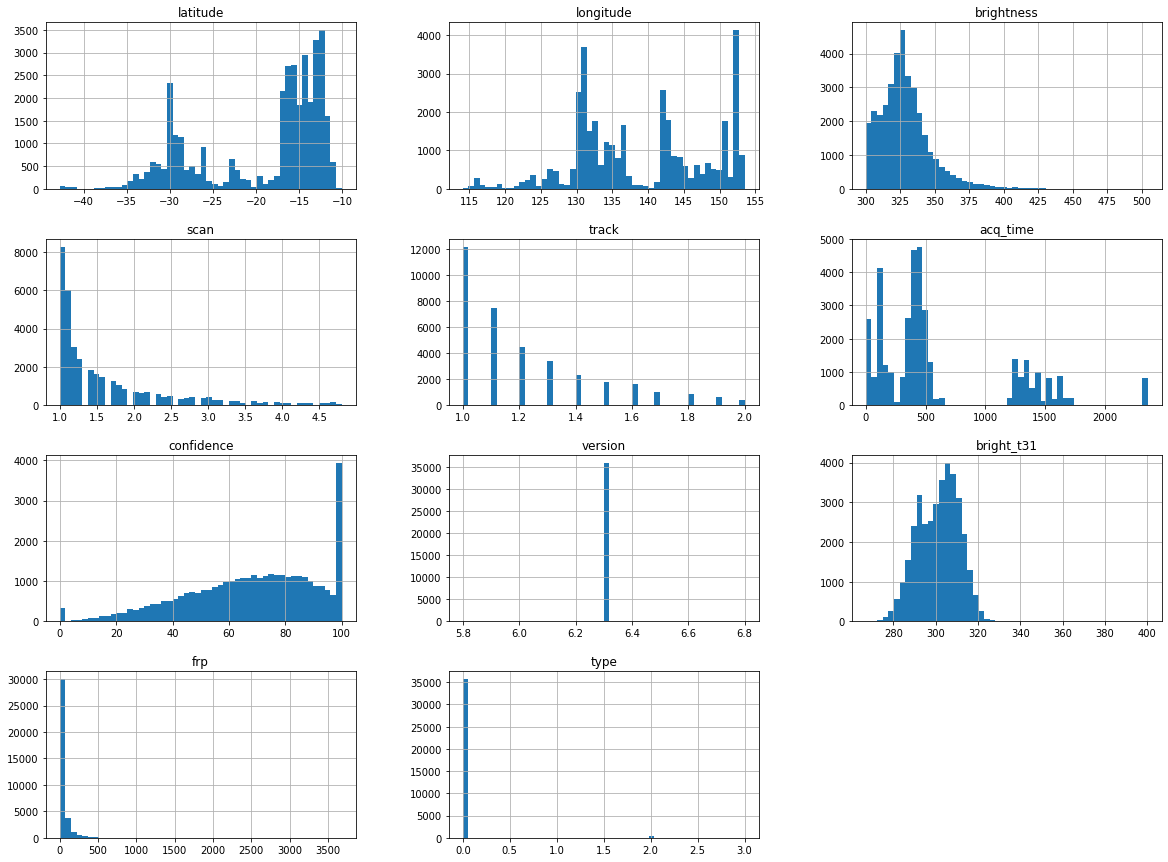

In [49]:
#To plot a histogram for each numerical attribute
fire.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

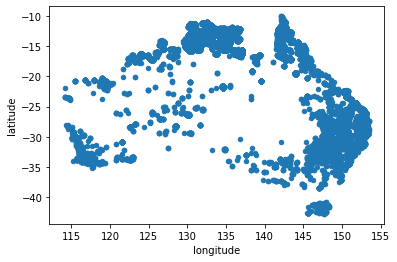

In [50]:
#Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
fire.plot(kind="scatter", x="longitude", y="latitude")

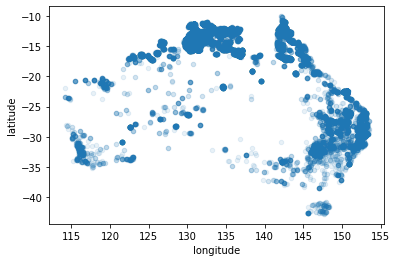

In [51]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

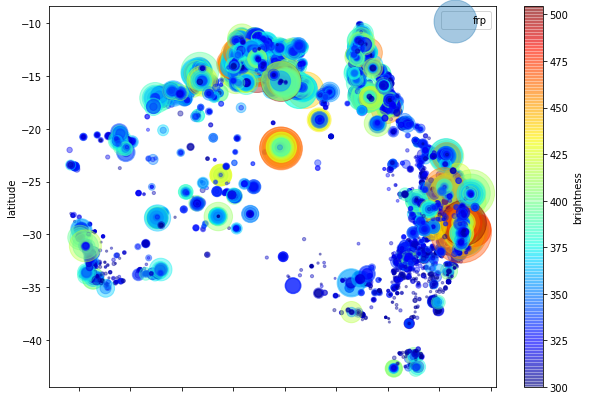

In [55]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=fire["frp"], label="frp", figsize=(10,7),
    c="brightness", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
# The radius of each circle represents the district’s population(option s) and the color represents the price (option c). 


In [56]:
# Now we will look at the correlation of all the attributes with the expected class attribute (confidence)
corr_matrix = fire.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [57]:
corr_matrix["confidence"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

confidence    1.000000
brightness    0.614691
frp           0.355388
bright_t31    0.238506
latitude      0.020656
longitude    -0.035529
type         -0.041632
acq_time     -0.070012
scan         -0.103808
track        -0.105949
version            NaN
Name: confidence, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaa6992510>,
      dtype=object)

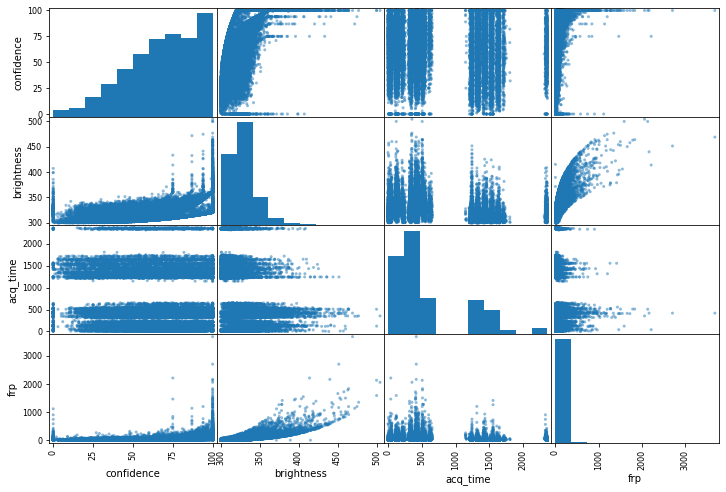

In [58]:
from pandas.plotting import scatter_matrix

attributes = ["confidence", "brightness", "acq_time",
              "frp"]
scatter_matrix(fire[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 1000.0, 0.0, 100.0)

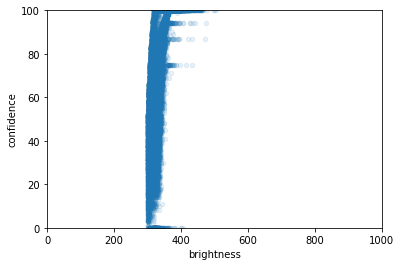

In [71]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
fire.plot(kind="scatter", x="brightness", y="confidence", alpha=0.1)
plt.axis([0, 1000, 0, 100])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

Experimenting with attribute contributions

In [ ]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

fire[""] = fire[""]/fire[""]